# Modelo predictivo amargo de un cocimiento de Estándar o Club Colombia

In [353]:
import pandas as pd

df = pd.read_csv('../src/2024_2025estesi.csv', sep=';', encoding='latin1')

df

,Coc,Marca,Volumen Total de filtraci¢n,Extracto CO2,L£pulo Pellet Herkules,Alpha cidos Herkules,Catalizador isomerizaci¢n,Amargo por cocimiento
0,1,CLUB COLOMBIA,1000,9,28,13.4,NaN,47.7
1,2,CLUB COLOMBIA,1000,9,28,13.4,NaN,44.9
2,3,CLUB COLOMBIA,989,9,27,13.4,NaN,44.6
3,4,CLUB COLOMBIA,995,9,28,13.4,NaN,45.3
4,5,ESTANDAR 900,942,0,0,13.4,0.0,0
...,...,...,...,...,...,...,...,...
3051,2583,ESTANDAR 18,989,3,43,13.4,1800.0,NaN
3052,2584,ESTANDAR 18,987,3,43,13.4,1800.0,NaN
3053,2585,ESTANDAR 18,989,0,0,13.4,0.0,NaN
3054,2586,ESTANDAR 18,986,4,66,13.4,2700.0,NaN


In [354]:
#Para revisar en qué columnas yo tengo un valor nulo
for column in df.columns:
    nulls = df[column].isnull().sum()
    if nulls > 0:
        print(column)

print('tengo nulos en todas estas columnas')

Extracto CO2
L£pulo Pellet  Herkules
Alpha  cidos Herkules
Catalizador isomerizaci¢n
Amargo por cocimiento
tengo nulos en todas estas columnas


In [355]:
df.shape

(3056, 8)

In [356]:
#Ahora a las columna de catalizador isomerización le voy a rellenar los valores nulos con el valor 0
df['Catalizador isomerizaci¢n'] = df['Catalizador isomerizaci¢n'].fillna(0)

In [357]:
#Ahora a borrar filas con nulos:
df = df.dropna()
df
#no borro aquí nada porque me baja más de 500 filas D:

,Coc,Marca,Volumen Total de filtraci¢n,Extracto CO2,L£pulo Pellet Herkules,Alpha cidos Herkules,Catalizador isomerizaci¢n,Amargo por cocimiento
0,1,CLUB COLOMBIA,1000,9,28,13.4,0.0,47.7
1,2,CLUB COLOMBIA,1000,9,28,13.4,0.0,44.9
2,3,CLUB COLOMBIA,989,9,27,13.4,0.0,44.6
3,4,CLUB COLOMBIA,995,9,28,13.4,0.0,45.3
4,5,ESTANDAR 900,942,0,0,13.4,0.0,0
...,...,...,...,...,...,...,...,...
3029,2561,ESTANDAR 18,977,3,43,13.4,1800.0,46.74
3045,2577,CLUB COLOMBIA,990,9,28,13.4,0.0,43.3
3046,2578,CLUB COLOMBIA,990,9,28,13.4,0.0,43.4
3047,2579,CLUB COLOMBIA,990,9,28,13.4,0.0,45.5


In [358]:
df = df.drop(columns=['Coc'])

In [359]:
df.info()
#no hay nulos
#Ahora para renombrar una columna
df = df.rename(columns={'Alpha \xa0cidos Herkules': 'Alpha acidos herkules'})
df = df.rename(columns={'Alpha \xa0cidos Herkules': 'Alpha acidos herkules'})

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 0 to 3048
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         894 non-null    object 
 1   Volumen Total de filtraci¢n   894 non-null    object 
 2   Extracto CO2                  894 non-null    object 
 3   L£pulo Pellet  Herkules       894 non-null    object 
 4   Alpha  cidos Herkules         894 non-null    object 
 5   Catalizador isomerizaci¢n     894 non-null    float64
 6   Amargo por cocimiento         894 non-null    object 
dtypes: float64(1), object(6)
memory usage: 55.9+ KB


In [360]:
#Ahora debo volver todas las columnas numericas
df['Catalizador isomerizaci¢n'] = pd.to_numeric(df['Catalizador isomerizaci¢n'], errors='coerce')
df['Extracto CO2'] = pd.to_numeric(df['Extracto CO2'], errors='coerce')
df['L£pulo Pellet  Herkules'] = pd.to_numeric(df['L£pulo Pellet  Herkules'], errors='coerce')
df['Alpha acidos herkules'] = pd.to_numeric(df['Alpha acidos herkules'], errors='coerce')
df['Amargo por cocimiento'] = pd.to_numeric(df['Amargo por cocimiento'], errors='coerce')
df['Volumen Total de filtraci¢n '] = pd.to_numeric(df['Volumen Total de filtraci¢n '], errors='coerce')


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 0 to 3048
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         894 non-null    object 
 1   Volumen Total de filtraci¢n   893 non-null    float64
 2   Extracto CO2                  893 non-null    float64
 3   L£pulo Pellet  Herkules       892 non-null    float64
 4   Alpha acidos herkules         893 non-null    float64
 5   Catalizador isomerizaci¢n     894 non-null    float64
 6   Amargo por cocimiento         890 non-null    float64
dtypes: float64(6), object(1)
memory usage: 55.9+ KB


In [362]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885 entries, 0 to 3048
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         885 non-null    object 
 1   Volumen Total de filtraci¢n   885 non-null    float64
 2   Extracto CO2                  885 non-null    float64
 3   L£pulo Pellet  Herkules       885 non-null    float64
 4   Alpha acidos herkules         885 non-null    float64
 5   Catalizador isomerizaci¢n     885 non-null    float64
 6   Amargo por cocimiento         885 non-null    float64
dtypes: float64(6), object(1)
memory usage: 55.3+ KB


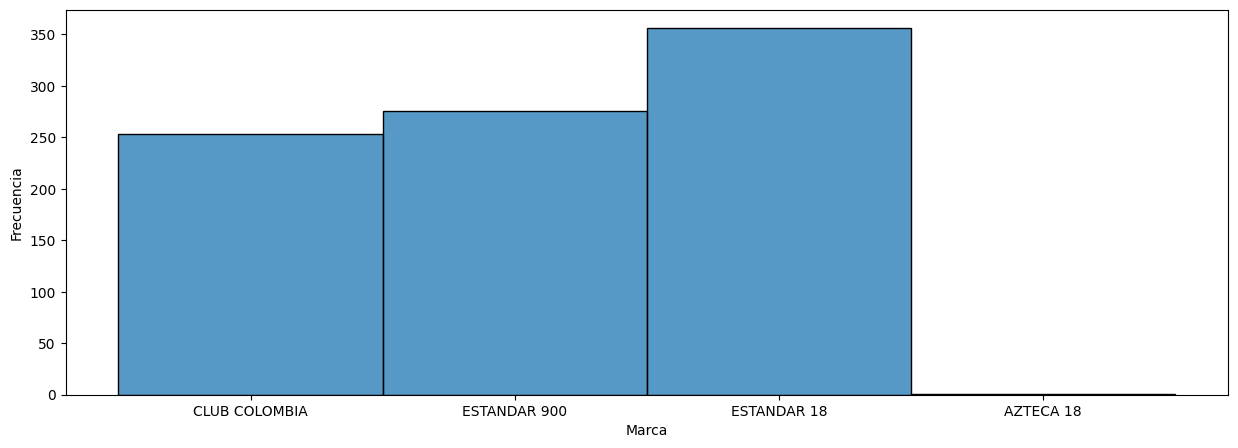

In [363]:
#Análisis univariante
#variable categórica
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, figsize=(15, 5))

sns.histplot(df['Marca'], ax=axis).set(ylabel='Frecuencia')
plt.show()

In [364]:
#Ahora debo borrar las filas de club colombia en mi columna marca
df = df[df['Marca'] != 'CLUB COLOMBIA']
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 4 to 3029
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         632 non-null    object 
 1   Volumen Total de filtraci¢n   632 non-null    float64
 2   Extracto CO2                  632 non-null    float64
 3   L£pulo Pellet  Herkules       632 non-null    float64
 4   Alpha acidos herkules         632 non-null    float64
 5   Catalizador isomerizaci¢n     632 non-null    float64
 6   Amargo por cocimiento         632 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.5+ KB


In [365]:
#Variables numéricas
from utils import columnas_numericas
columnas_numericas(df)
print(columnas_numericas(df))


['Volumen Total de filtraci¢n ', 'Extracto CO2', 'L£pulo Pellet  Herkules', 'Alpha acidos herkules', 'Catalizador isomerizaci¢n', 'Amargo por cocimiento']


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 4 to 3029
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         632 non-null    object 
 1   Volumen Total de filtraci¢n   632 non-null    float64
 2   Extracto CO2                  632 non-null    float64
 3   L£pulo Pellet  Herkules       632 non-null    float64
 4   Alpha acidos herkules         632 non-null    float64
 5   Catalizador isomerizaci¢n     632 non-null    float64
 6   Amargo por cocimiento         632 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.5+ KB


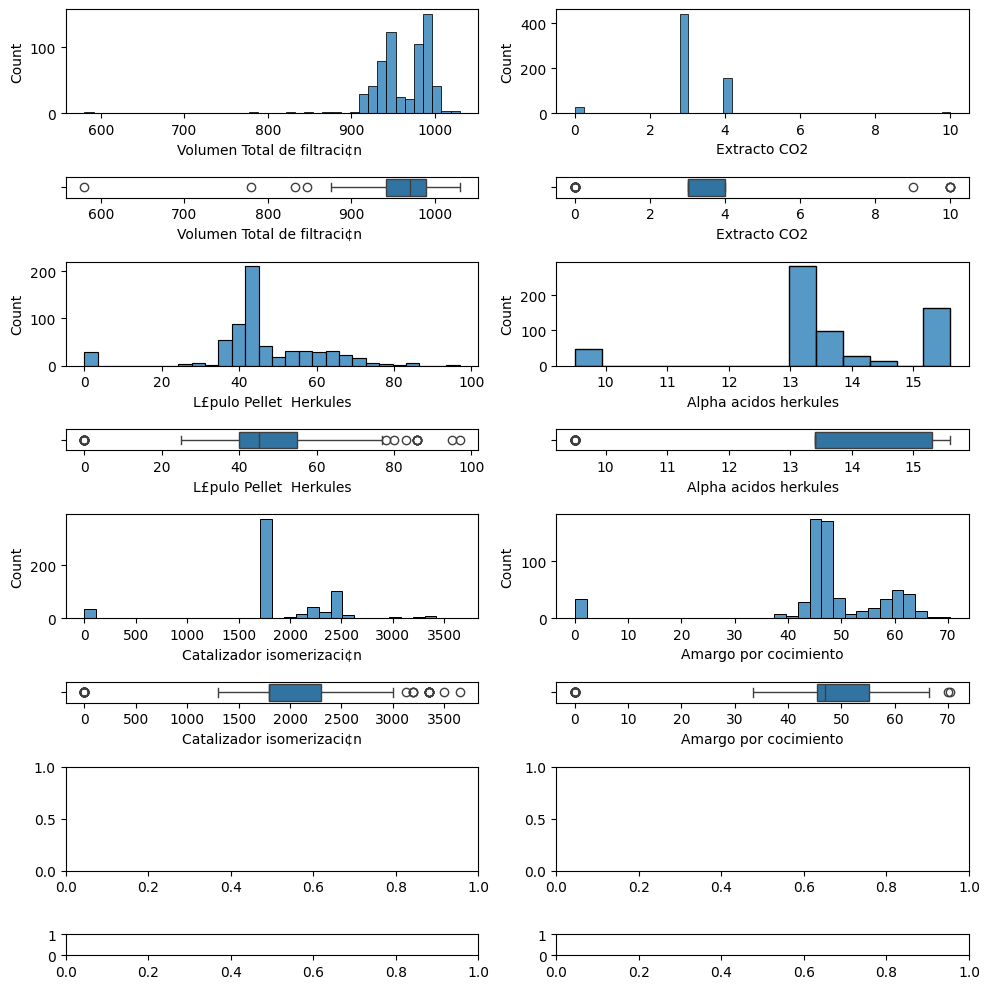

In [367]:
#Análisis univariante
#Variables numéricas
from utils import analisis_numerico_numerico
analisis_numerico_numerico(df,'Amargo por cocimiento')

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 4 to 3029
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         632 non-null    object 
 1   Volumen Total de filtraci¢n   632 non-null    float64
 2   Extracto CO2                  632 non-null    float64
 3   L£pulo Pellet  Herkules       632 non-null    float64
 4   Alpha acidos herkules         632 non-null    float64
 5   Catalizador isomerizaci¢n     632 non-null    float64
 6   Amargo por cocimiento         632 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.5+ KB


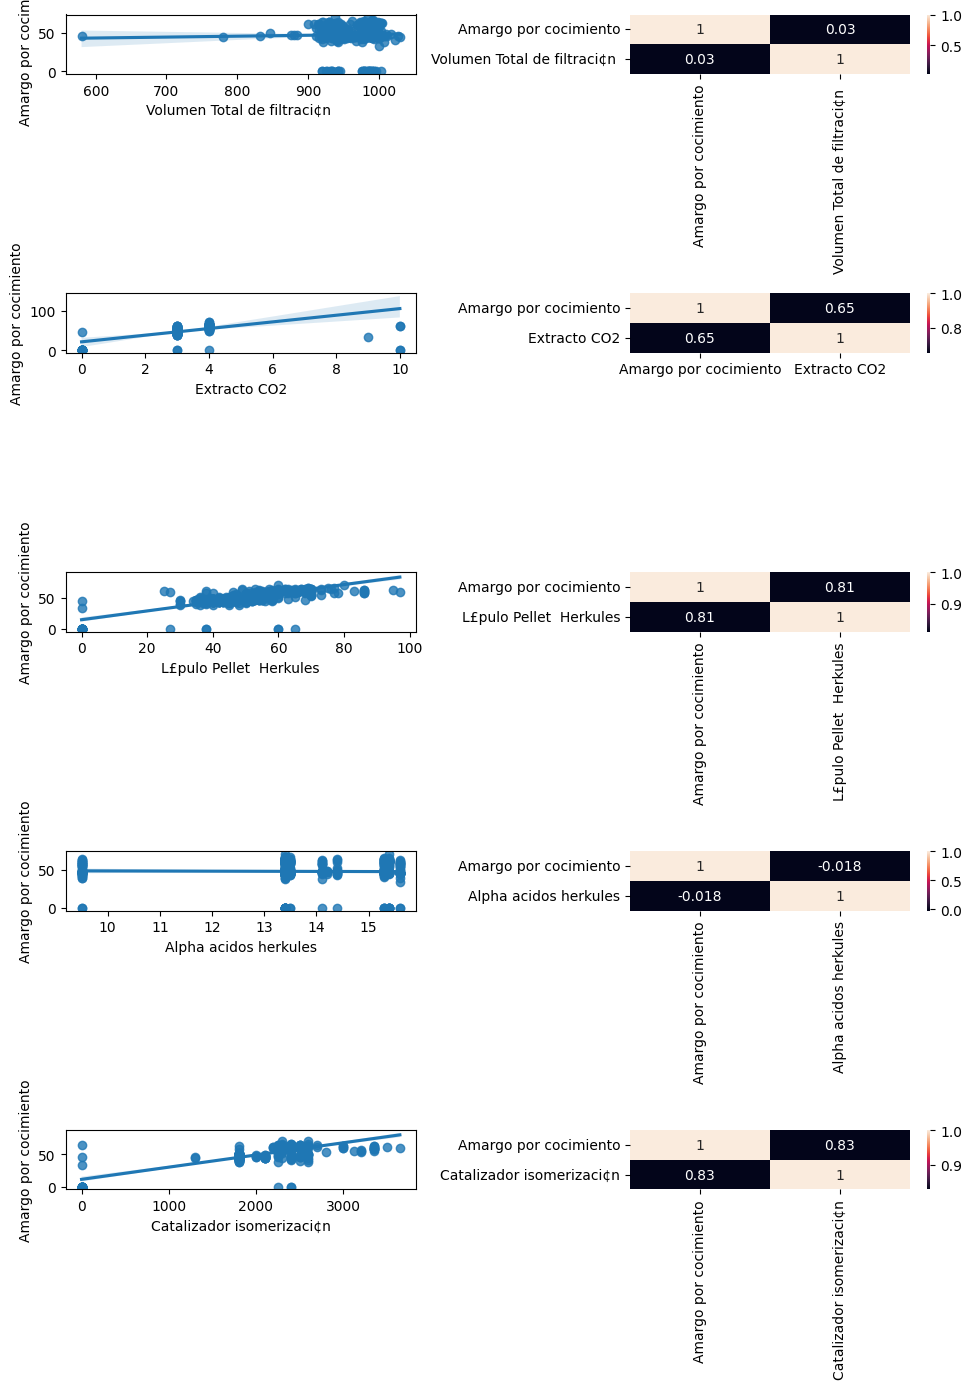

In [369]:
#Se continua con el análisis multivariable
fig, axis = plt.subplots(5, 2, figsize=(10, 14))

sns.regplot(ax=axis[0, 0], data=df, x='Volumen Total de filtraci¢n ', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Volumen Total de filtraci¢n ']].corr(), ax=axis[0, 1], annot=True)
sns.regplot(ax=axis[1, 0], data=df, x='Extracto CO2', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Extracto CO2']].corr(), ax=axis[1, 1], annot=True)
sns.regplot(ax=axis[2, 0], data=df, x='L£pulo Pellet  Herkules', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'L£pulo Pellet  Herkules']].corr(), ax=axis[2, 1], annot=True)
sns.regplot(ax=axis[3, 0], data=df, x='Alpha acidos herkules', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Alpha acidos herkules']].corr(), ax=axis[3, 1], annot=True)
sns.regplot(ax=axis[4, 0], data=df, x='Catalizador isomerizaci¢n', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Catalizador isomerizaci¢n']].corr(), ax=axis[4, 1], annot=True)

plt.tight_layout()
plt.show()

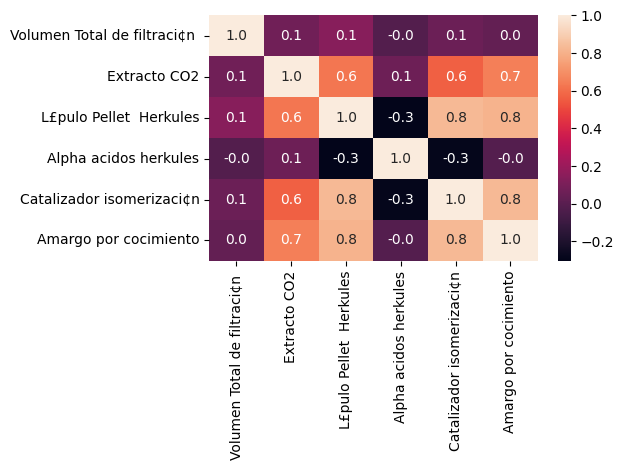

In [370]:
#Ahora análisis numérico categórico.
#Factorizo la variable categórica.
# no factorizo la categórica porque el random forest no necesita todo numérico 
df['Marca'] = pd.factorize(df['Marca'])[0]

sns.heatmap(df[['Volumen Total de filtraci¢n ','Extracto CO2','L£pulo Pellet  Herkules','Alpha acidos herkules','Catalizador isomerizaci¢n','Amargo por cocimiento']].corr(), annot=True,fmt='.1f')
plt.tight_layout()
plt.show()

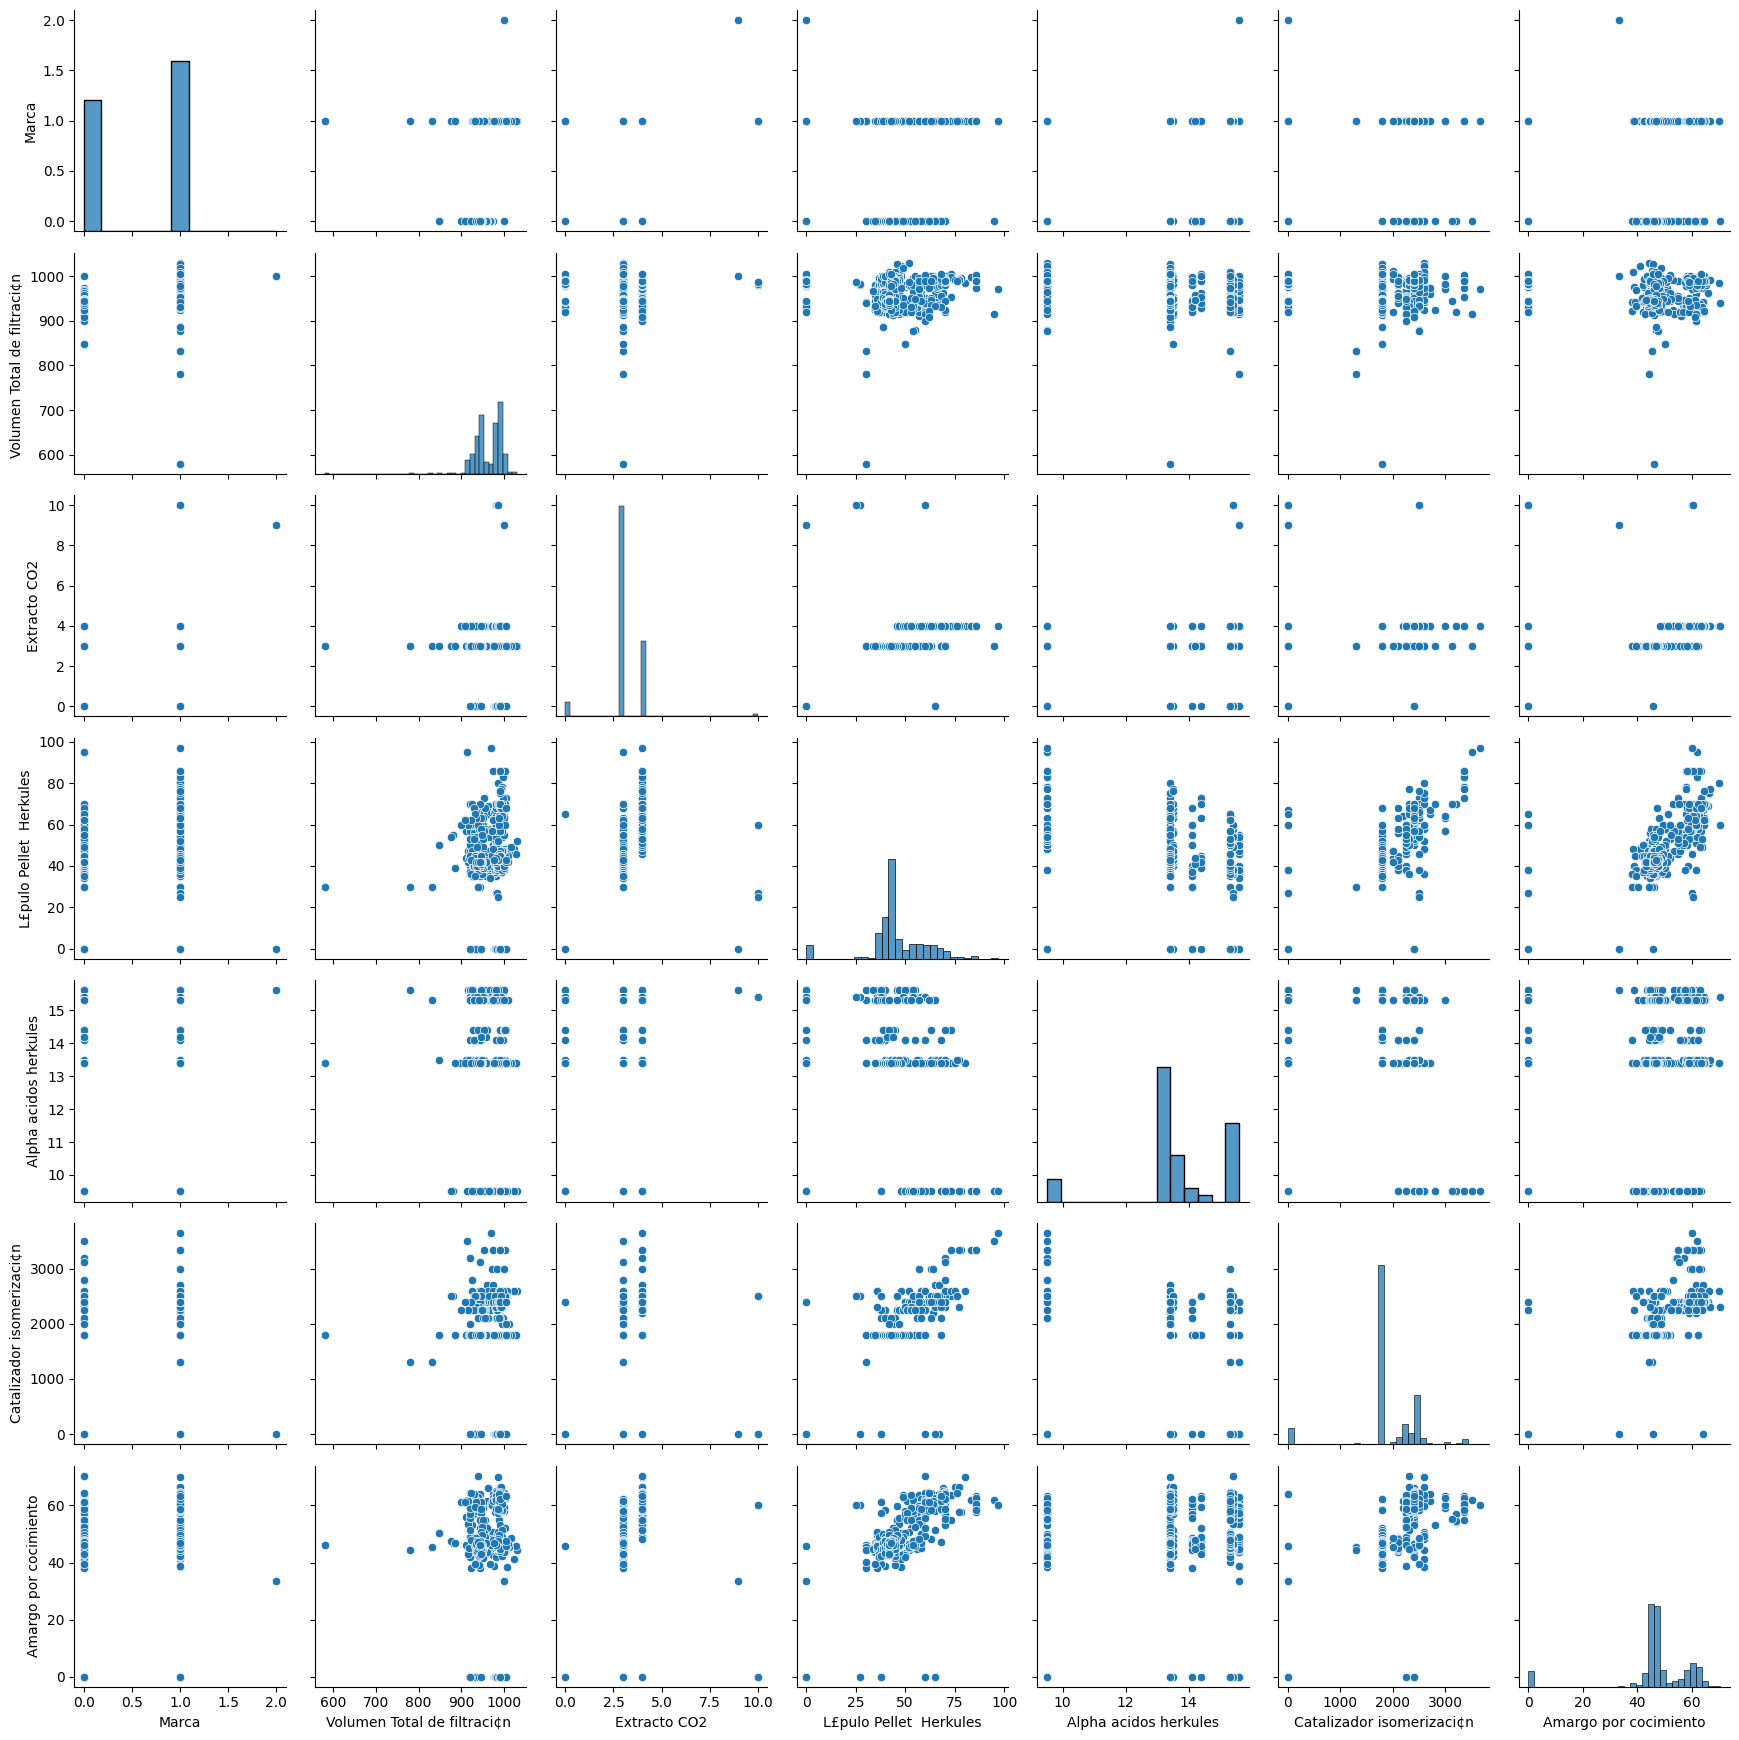

In [371]:
sns.pairplot(data=df)

plt.tight_layout()
plt.show()

In [372]:
from utils import analisis_ric
#Se calcularán los límites para retirar los datos atípicos de las variables en cuestión.
analisis_ric(df=df)

columna: Marca limites superior 2.5 e inferior -1.5
columna: Volumen Total de filtraci¢n  limites superior 1062.0 e inferior 870.0
columna: Extracto CO2 limites superior 5.5 e inferior 1.5
columna: L£pulo Pellet  Herkules limites superior 77.5 e inferior 17.5
columna: Alpha acidos herkules limites superior 18.150000000000002 e inferior 10.55
columna: Catalizador isomerizaci¢n limites superior 3050.0 e inferior 1050.0
columna: Amargo por cocimiento limites superior 69.60374999999999 e inferior 30.973750000000003


In [373]:
#df = df[(df['Marca'] >= -3) & (df['Marca'] <= 5)]
df = df[(df['Volumen Total de filtraci¢n '] >= 869.375) & (df['Volumen Total de filtraci¢n '] <= 1062.375)]
df = df[(df['Extracto CO2'] >= 3) & (df['Extracto CO2'] <= 4)]
df = df[(df['L£pulo Pellet  Herkules'] >= 32.5) & (df['L£pulo Pellet  Herkules'] <= 52.5)]
df = df[(df['Alpha acidos herkules'] >= 10.55) & (df['Alpha acidos herkules'] <= 18.15)]
df = df[(df['Catalizador isomerizaci¢n'] >= 1800) & (df['Catalizador isomerizaci¢n'] <= 3000)]
df = df[(df['Amargo por cocimiento'] >= 41.949) & (df['Amargo por cocimiento'] <= 51.07)]

In [374]:
df.shape

(379, 7)

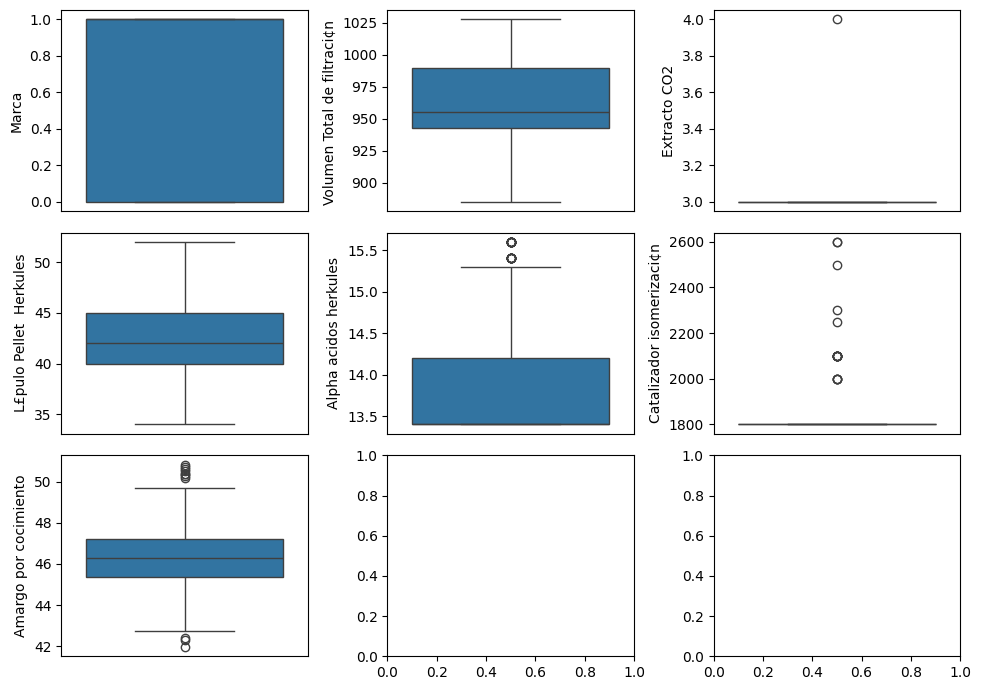

In [375]:
from utils import analisis_boxplot
analisis_boxplot(df,'Amargo por cocimiento')
#Se cuenta con los datos sin atípicos no deseados.

In [376]:
#Ahora debo dividir los datos
from sklearn.model_selection import train_test_split
#Aquí saco la columna que voy a predecir
X = df.drop(['Amargo por cocimiento'], axis=1)
#Aquí digo cuál es la columna que voy a predecir
Y = df['Amargo por cocimiento']
#Aquí hago el split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.head()

,Marca,Volumen Total de filtraci¢n,Extracto CO2,L£pulo Pellet Herkules,Alpha acidos herkules,Catalizador isomerizaci¢n
1917,1,979.0,3.0,42.0,15.3,1800.0
1160,0,920.0,3.0,37.0,15.3,1800.0
2204,0,940.0,3.0,45.0,13.4,1800.0
2187,1,990.0,3.0,47.0,13.4,1800.0
2267,0,950.0,3.0,49.0,13.4,1800.0


In [377]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [378]:
Y_pred= model.predict(X_test)
Y_pred

array([46.27030333, 46.52583962, 45.16863119, 45.98207167, 46.829475  ,
       48.735     , 47.47647143, 46.33266786, 47.47647143, 46.24581   ,
       45.91942   , 47.7821    , 45.93316   , 46.52595   , 45.65449571,
       45.3089    , 44.97269738, 46.3654    , 46.5720381 , 46.3775    ,
       45.29869201, 47.75355   , 46.54401667, 46.60247   , 46.7226    ,
       45.87601667, 45.31676667, 45.29869201, 45.15064571, 45.71423333,
       46.61674667, 47.67104   , 45.289125  , 45.88076179, 46.757     ,
       45.594875  , 47.22958623, 46.16912   , 46.5872    , 46.0294    ,
       47.8105    , 46.80925   , 46.18793167, 46.05180333, 48.02815   ,
       45.51018167, 45.2568219 , 44.609155  , 47.869375  , 44.581925  ,
       45.3773    , 46.515     , 49.07485   , 46.17021667, 45.54641266,
       47.30063865, 46.47235988, 47.9579486 , 45.89438333, 49.15776667,
       46.52583962, 47.2104    , 46.45723262, 46.59007619, 46.86796667,
       46.31710833, 45.08886667, 45.51864635, 46.09825   , 45.79

In [379]:
#ahora debo evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(Y_test, Y_pred)}')
print(f'R2: {r2_score(Y_test, Y_pred)}')

from math import sqrt
print(f'RMSE: {sqrt(mean_squared_error(Y_test, Y_pred))}')

MSE: 2.213244244932348
R2: -0.036699504913169534
RMSE: 1.4876976322265045


In [380]:
#Hiperparametrización
grid = {
    'criterion' : ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [1,2,4],
    'max_features' : ['auto','sqrt','log2',2,3,4,5],
    'n_estimators' : [20,50,100]

}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model,grid,scoring='neg_mean_squared_error',n_jobs=2)
clf.fit(X_train,Y_train)

best_model = clf.best_estimator_

print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'absolute_error', 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 20}
-2.085807202694673


/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
720 fits failed out of a total of 5040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

In [381]:
# Hacer las predicciones
Y_best_pred = best_model.predict(X_test)
Y_best_pred

array([46.2195 , 46.28975, 45.51   , 45.965  , 45.776  , 46.45925,
       46.61125, 45.5585 , 46.61125, 46.49825, 45.97825, 47.608  ,
       46.053  , 46.382  , 46.09325, 45.729  , 45.24425, 45.7565 ,
       46.4115 , 45.79025, 45.7455 , 47.231  , 46.83675, 45.81025,
       46.63   , 45.99825, 46.4695 , 45.7455 , 46.004  , 45.683  ,
       46.50675, 47.00225, 45.641  , 46.10025, 46.63   , 45.705  ,
       46.41325, 45.97825, 45.905  , 46.218  , 48.03275, 46.88325,
       46.2175 , 45.90625, 47.611  , 45.623  , 46.07   , 45.64275,
       46.686  , 45.64275, 45.30325, 46.58275, 48.4625 , 46.184  ,
       45.80225, 47.002  , 46.01025, 46.9545 , 45.90625, 46.2425 ,
       46.28975, 46.74625, 46.09825, 46.38575, 46.42325, 45.647  ,
       45.33775, 45.80225, 46.156  , 46.40975, 46.1565 , 46.35825,
       46.6145 , 45.80225, 45.54025, 45.7455 ])

In [ ]:
#ahora debo evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(Y_test, Y_best_pred)}')
print(f'R2: {r2_score(Y_test, Y_best_pred)}')

from math import sqrt
print(f'RMSE: {sqrt(mean_squared_error(Y_test, Y_best_pred))}')

#Error en 1 unidad de amargo, ok!

MSE: 1.963059024671054
R2: 0.08048904966021153
RMSE: 1.4010920828664524
